<a href="https://colab.research.google.com/github/haoming150ty/Personal-Portfolio/blob/main/Haoming_Zhang_Assignment1_BDM_F24_Wanik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BDM Individual Assignment 1: EDA (F24)

**OPIM 5641: Business Decision Modeling - University of Connecticut**

--------------------------------------------------------------------------
* Haoming Zhang
* haz23017

**Description:** Complete an exploratory data analysis on this dataset.

You may work with your fellow classmates, but you need to complete the assignment on your own. I expect different headers and COMMENTS (comments are the key to showing that you really know your stuff - without comments, your code is useless to me).

**Rubric:**
* (100 pts total, 10 pts each) To receive full credit on each item - plots, tables, calculations must have been made accurately and be well-labeled. Comments should be provided for all arguments (strive for one comment per line). We want to be able to tell that you know your stuff!

The first lines were included for your convenience.

# Read County-level Econ Data for MA
* https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income')[1]
df

,State Rank,US Rank,County,Per capita income,Median household income,Median family income,Population,Number of households
0,1.0,25.0,Norfolk,"$46,920","$84,916","$108,943",677296,257451
1,2.0,30.0,Middlesex,"$42,861","$82,090","$104,032",1522533,581120
2,3.0,102.0,Barnstable,"$36,142","$60,526","$76,311",215449,95398
3,NaN,NaN,Massachusetts,"$35,763","$66,866","$84,900",6605058,2530147
4,4.0,115.0,Plymouth,"$35,220","$75,092","$90,431",497386,179617
5,5.0,117.0,Essex,"$35,167","$67,311","$84,185",750808,286008
6,6.0,164.0,Dukes,"$33,363","$66,288","$82,452",16739,5891
7,7.0,193.0,Suffolk,"$32,835","$53,540","$61,449",735701,288240
8,8.0,244.0,Worcester,"$31,537","$65,223","$81,519",802688,299663
9,9.0,365.0,Hampshire,"$29,460","$61,227","$81,385",159267,58828


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State Rank               13 non-null     float64
 1   US Rank                  13 non-null     float64
 2   County                   15 non-null     object 
 3   Per capita income        15 non-null     object 
 4   Median household income  15 non-null     object 
 5   Median family income     15 non-null     object 
 6   Population               15 non-null     int64  
 7   Number of households     15 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ KB


# 1. How many counties have a `df['Per capitaincome']` greater than or equal to...
* Massachusetts (row 3)?
* United states (row 13)?

Don't use df['County'] == Massachusetts or United States when performing this calculation - we only want Massachusetts counties!

You must use Python to solve this problem.

In [ ]:
theValue_Mass = df[df['County'] == 'Massachusetts'] # extract the row of data with County == Massachusetts and store it as a new variable called theValue_Mass
theValue_Mass # checking the result
theValue_Mass = theValue_Mass['Per capita income'].iloc[0] # make the first number of column Per capita income (.iloc[0]) the new value of theValue_Mass
print('The per capita income of Massachusetts is',theValue_Mass) # see if only one number (the value of per capita income of Massachusetts) comes out

theValue_US = df[df['County'] == 'United States'] # extract the row of data with County == United States and store it as a new variable called theValue_US
theValue_US # checking the result
theValue_US = theValue_US['Per capita income'].iloc[0] # make the first number of column Per capita income (.iloc[0]) the new value of theValue_US
print('The per capita income of United States is',theValue_US) # check the result

df = df[df['County'] != 'Massachusetts'] # remove the row of Massachusetts data
df = df[df['County'] != 'United States'] # remove the row of Massachusetts data from the df without Massachusetts data

print('There are', df[df['Per capita income'] >= theValue_Mass].shape[0], 'counties having per capita income greater than Massachussets.') # show counties with per capita income greater than that of Masschusetts or United States
print('There are', df[df['Per capita income'] >= theValue_US].shape[0], 'counties having per capita income greater than United States.') # show counties with per capita income greater than that of Masschusetts or United States


The per capita income of Massachusetts is $35,763
The per capita income of United States is $28,155
There are 3 counties having per capita income greater than Massachussets.
There are 12 counties having per capita income greater than United States.


# 2. Read this... then perform string substition (for $ and ,) and convert `Per capitaincome`,	`Medianhouseholdincome`,	and `Medianfamilyincome` to numeric
* https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
* https://stackoverflow.com/questions/43096522/remove-dollar-sign-from-entire-python-pandas-dataframe
* https://www.skytowner.com/explore/removing_comma_from_column_values_in_pandas_dataframe

Just overwrite the columns inplace and move on!

In [ ]:
df['Per capita income'] = df['Per capita income'].str.replace('$', '') # replace dollar sign with white space
df['Per capita income'] = df['Per capita income'].str.replace(',', '') # replace comma with white space
df['Per capita income'] = pd.to_numeric(df['Per capita income'])
# remove the dollar sign and comma from per capita income column and then convert it into numeric data type

df['Median household income'] = df['Median household income'].str.replace('$', '') # replace dollar sign with white space
df['Median household income'] = df['Median household income'].str.replace(',', '') # replace comma with white space
df['Median household income'] = pd.to_numeric(df['Median household income'])
# remove the dollar sign and comma from median household income and then convert it into numeric data type

df['Median family income'] = df['Median family income'].str.replace('$', '') # replace dollar sign with white space
df['Median family income'] = df['Median family income'].str.replace(',', '') # replace comma with white space
df['Median family income'] = pd.to_numeric(df['Median family income'])
# remove the dollar sign and comma from median family income and then convert it into numeric data type

df.info()
# check changed df overview

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State Rank               13 non-null     float64
 1   US Rank                  13 non-null     float64
 2   County                   13 non-null     object 
 3   Per capita income        13 non-null     int64  
 4   Median household income  13 non-null     int64  
 5   Median family income     13 non-null     int64  
 6   Population               13 non-null     int64  
 7   Number of households     13 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 936.0+ bytes


# 3. Delete `df['County']` equals Massachussetts and `df['County']` equals  United States.
You don't need these anymore.

In [ ]:
df = df[df['County'] != 'Massachusetts'] # keep all counties not equal to Massachusetts
df = df[df['County'] != 'United States'] # from the previous step keep all the counties not equal to United States
df # check the new df

,State Rank,US Rank,County,Per capita income,Median household income,Median family income,Population,Number of households
0,1.0,25.0,Norfolk,46920,84916,108943,677296,257451
1,2.0,30.0,Middlesex,42861,82090,104032,1522533,581120
2,3.0,102.0,Barnstable,36142,60526,76311,215449,95398
4,4.0,115.0,Plymouth,35220,75092,90431,497386,179617
5,5.0,117.0,Essex,35167,67311,84185,750808,286008
6,6.0,164.0,Dukes,33363,66288,82452,16739,5891
7,7.0,193.0,Suffolk,32835,53540,61449,735701,288240
8,8.0,244.0,Worcester,31537,65223,81519,802688,299663
9,9.0,365.0,Hampshire,29460,61227,81385,159267,58828
10,10.0,374.0,Berkshire,29294,48450,65216,130545,55301


# 4. Make a boxplot of the number of households column.
Add a fun color, add nice plot labels and a title, play with the figure size.

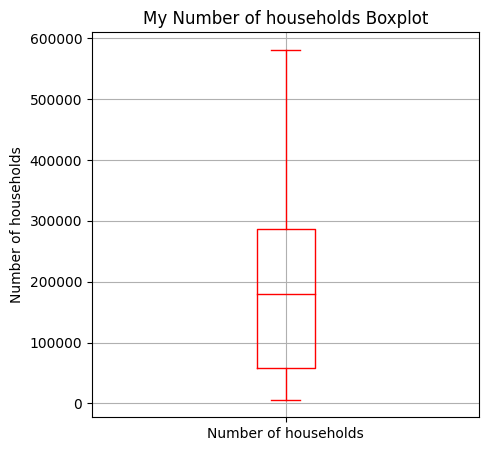

In [ ]:
import matplotlib.pyplot as plt # import pyplot library
df.boxplot(column=['Number of households'], figsize=(5,5), color = 'red') # make a boxplot
plt.title('My Number of households Boxplot') # add title
plt.ylabel('Number of households') # label the y axis
plt.show() # show the plot

# 5. Make a histogram of the number of households column.
Add a fun color, add nice plot labels and a title, play with the figure size.

Which do you prefer - the boxplot or the histogram? Why?

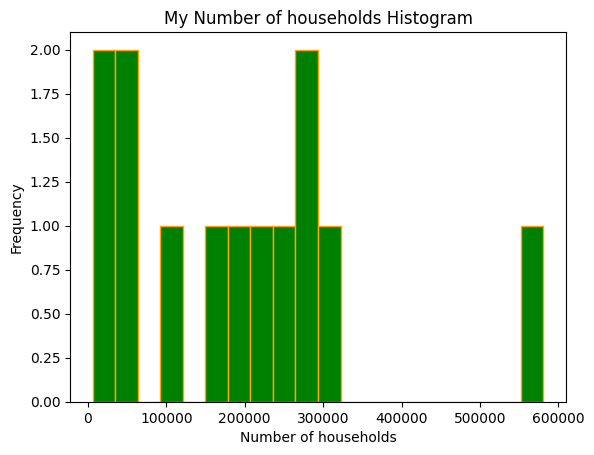

In [ ]:
df['Number of households'].plot.hist(color = 'green', edgecolor = 'orange', bins = 20) # draw a histogram
plt.title('My Number of households Histogram') # add title
plt.xlabel('Number of households') # label the x axis
plt.ylabel('Frequency') # label y axis
plt.show() # show the plot

# 6. Make a barplot of the `Medianfamilyincome` and sort from low to high.
We didn't teach this in class - Google the answer! Pick a fun color and add nice title and labels. Make sure everything is legible, no miscellaneous text.

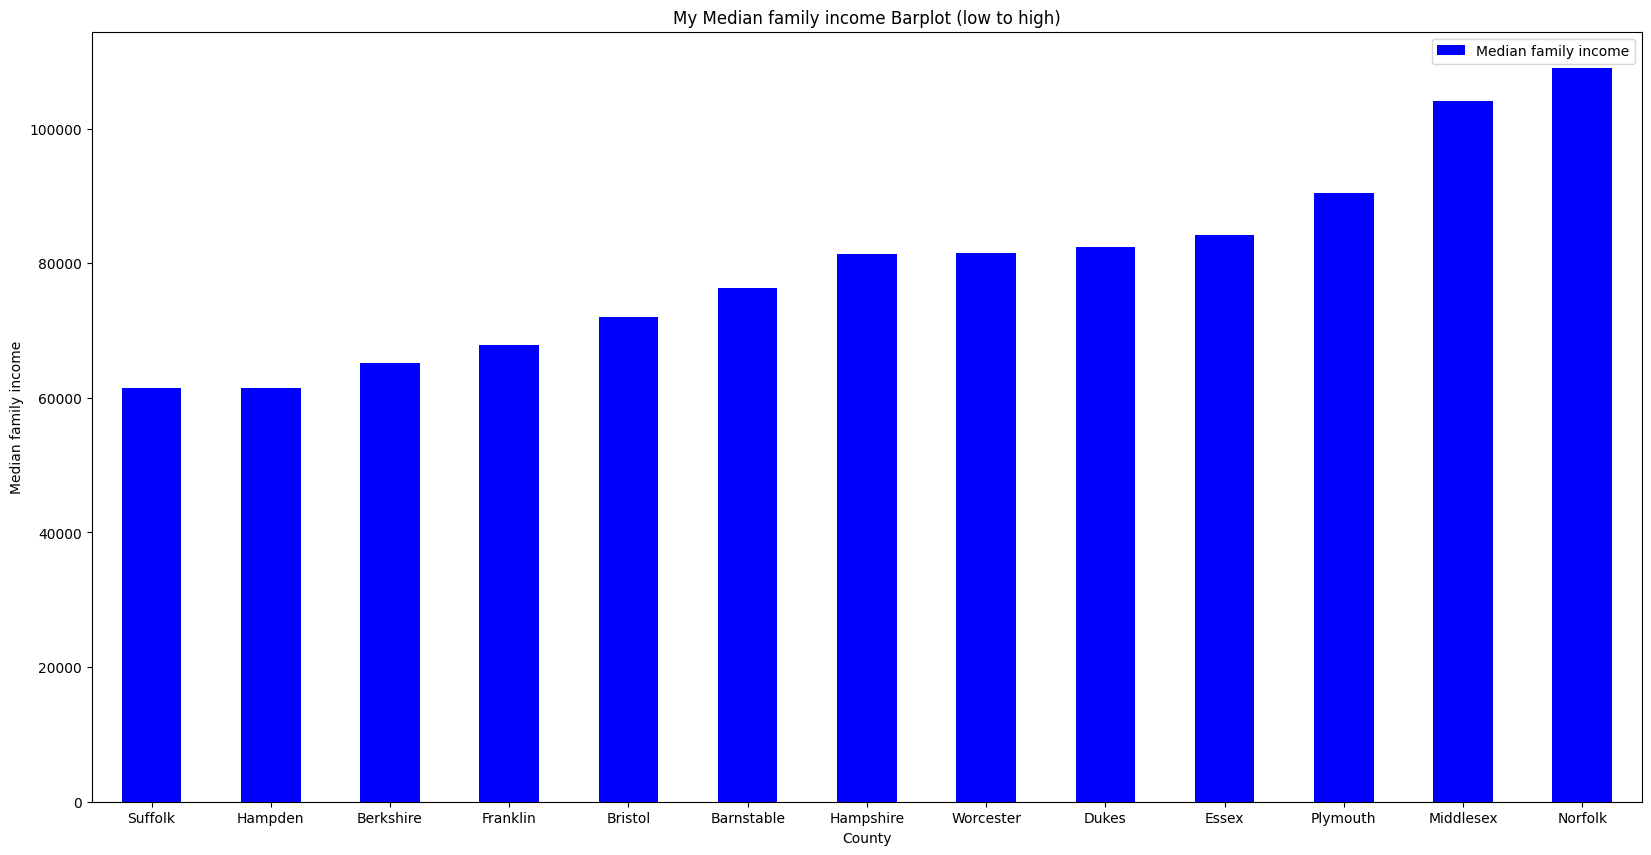

In [ ]:
df_sorted = df.sort_values('Median family income') # use sort_values to put numbers in order (default from low to high)
df_sorted.plot.bar(x = 'County', y = 'Median family income', rot = 0, color = 'blue', figsize = (20,10)) # create a bar plot with some configuration
plt.title('My Median family income Barplot (low to high)') # add title
plt.ylabel('Median family income') # give y axis name
plt.show() # show the plot

# 7. Same as 6, but from high to low.
We didn't teach this in class - Google the answer! Pick a fun color and add nice title and labels. Make sure everything is legible, no miscellaneous text.

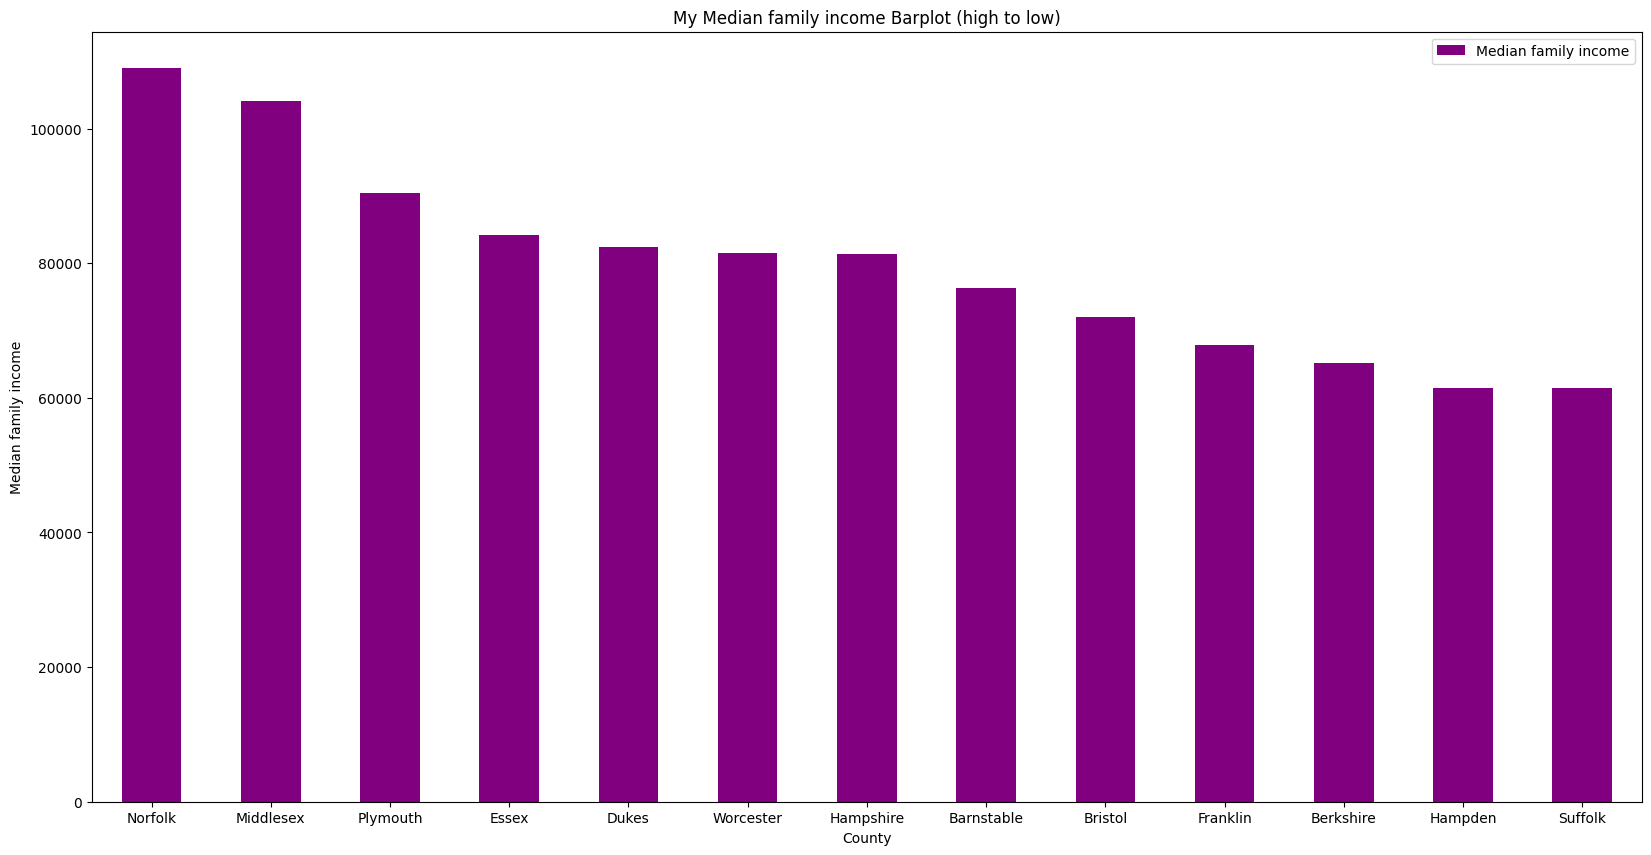

In [ ]:
df_sorted = df.sort_values('Median family income', ascending = False) # use same method as 6 but change ascending to descending
df_sorted.plot.bar(x = 'County', y = 'Median family income', rot = 0, color = 'purple', figsize = (20,10))  # create a bar plot
plt.title('My Median family income Barplot (high to low)') # add title
plt.ylabel('Median family income') # label y axis
plt.show() # show the plot


# 8. Compute summary statistics on all numeric columns using `.describe()` from pandas.

In [ ]:
df.describe() # use df.sescribe() to show common useful statistical measurements

,State Rank,US Rank,Per capita income,Median household income,Median family income,Population,Number of households
count,13.00000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000
mean,7.00000,261.000000,33593.230769,63286.000000,79784.615385,5.072949e+05,194313.692308
std,3.89444,228.501641,5897.836583,11813.005474,14954.473342,4.124017e+05,156113.128206
min,1.00000,25.000000,25817.000000,48450.000000,61449.000000,1.673900e+04,5891.000000
25%,4.00000,115.000000,29294.000000,53663.000000,67785.000000,1.592670e+05,58828.000000
50%,7.00000,193.000000,32835.000000,61227.000000,81385.000000,4.973860e+05,179617.000000
75%,10.00000,374.000000,35220.000000,67311.000000,84185.000000,7.357010e+05,286008.000000
max,13.00000,874.000000,46920.000000,84916.000000,108943.000000,1.522533e+06,581120.000000


# 9. Recreate the output from `.describe()` for the column `df['Medianhouseholdincome']` using numpy.
Use one code cell for each component of describe (min, max, std, mean, etc.)

In [ ]:
import numpy as np # import numpy library
print('The mean of median household income is:', np.mean(df['Median household income'])) # print out mean using np.mean with explanatory language
print('The standard deviation of median household income is:', np.std(df['Median household income'])) # print out the standard deviation using np.std in a whole sentence
print('The minimum of median household income is:', np.min(df['Median household income'])) # print out minimum value
print('The maximum of median household income is:', np.max(df['Median household income'])) # print out maximum value
print('The median of median household income is:', np.median(df['Median household income'])) # print out median
print('The 25 percentile of median household income is:', np.percentile(df['Median household income'], 25)) # print out first quartile
print('The 50 percentile of median household income is:', np.percentile(df['Median household income'], 50)) # print out second quartile
print('The 75 percentile of median household income is:', np.percentile(df['Median household income'], 75)) # print out third quartile
# use np.stats name to access different figures and add some explanatory language inside print

The mean of median household income is: 63286.0
The standard deviation of median household income is: 11349.568544832273
The minimum of median household income is: 48450
The maximum of median household income is: 84916
The median of median household income is: 61227.0
The 25 percentile of median household income is: 53663.0
The 50 percentile of median household income is: 61227.0
The 75 percentile of median household income is: 67311.0


# 10. Write 5 meaningful bullets about what you learned in this assignment.
Is this new material for you? Or have you learned this before? What did you like vs. dislike? Are you excited for class?

In [ ]:
# 1 Python is relatively a new language to me in spite I learned SQL and R in
# previous BAPM classes. I got to know some basic syntax
# 2 Always count from 0 in python!
# 3 Always import the libraries needed first!
# 4 It's helpful to constantly check if changes are saved with df.info or df.shape
# 5 There are often more than one way to solve a problem - we could utilize the
# AI to be inspired of other solutions